# Stock Prices Data Analysing Project 

In this data project we will do exploratory data analysis of stock prices. 

We need to get data using pandas datareader. We will get stock information for the following banks:
* Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

There are some points that we need to figure out:
1. How to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. 
2. Setting start and end datetime objects.
3. The ticker symbol for each bank.
4. How to use datareader to grab info on the stock.

In [1]:
# Imports
from pandas_datareader import data, wb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import datetime
import plotly
import cufflinks as cf
cf.go_offline()
%matplotlib inline

# Set plot style
sns.set_style('whitegrid')

# Set start time
start = datetime.datetime(2016,1,1)
# Set end time
end = datetime.datetime(2020,10,11)

# Bank of America
BAC = data.DataReader('BAC', 'yahoo', start, end)
# Citi Group
C = data.DataReader('C', 'yahoo', start, end)
# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)
# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)
# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)
# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

# Could also do this for a Panel Object
# df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)

# Create a list of the ticker symbols (as strings) in alphabetical order and name it as tickers.
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

# Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks.
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1, keys=tickers)

# Set the column name levels
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

# Check the head of the bank_stocks dataframe.
bank_stocks.head()

Bank Ticker        BAC                                                   \
Stock Info        High    Low       Open  Close       Volume  Adj Close   
Date                                                                      
2016-01-04   16.490000  16.25  16.450001  16.43  114888000.0  14.983289   
2016-01-05   16.590000  16.23  16.520000  16.43   66670000.0  14.983289   
2016-01-06   16.290001  16.02  16.190001  16.08  102760800.0  14.664108   
2016-01-07   15.900000  15.44  15.730000  15.50  116255900.0  14.135177   
2016-01-08   15.940000  15.16  15.940000  15.20  124782400.0  13.861594   

Bank Ticker          C                                     ...             MS  \
Stock Info        High        Low       Open      Close    ...           Open   
Date                                                       ...                  
2016-01-04   51.189999  50.189999  50.750000  51.130001    ...      30.700001   
2016-01-05   51.610001  50.410000  51.540001  50.860001    ...      31.480000   
2016-01-06   50.580002  49.759998  50.099998  50.119999    ...      30.629999   
2016-01-07   49.380001  47.500000  49.070000  47.560001    ...      29.879999   
2016-01-08   48.740002  46.029999  48.730000  46.130001    ...      29.410000   

Bank Ticker                                          WFC             \
Stock Info       Close      Volume  Adj Close       High        Low   
Date                                                                  
2016-01-04   31.480000  15749200.0  27.818462  53.270000  52.299999   
2016-01-05   31.280001   9850500.0  27.641729  53.270000  52.549999   
2016-01-06   30.500000  13057400.0  26.952450  52.619999  51.830002   
2016-01-07   28.980000  18138200.0  25.609251  51.189999  50.150002   
2016-01-08   28.379999  15295600.0  25.079033  50.860001  49.459999   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2016-01-04   53.090000  52.910000  25985400.0  44.764740  
2016-01-05   52.930000  52.889999  14759600.0  44.747814  
2016-01-06   52.119999  51.880001  20026400.0  43.893295  
2016-01-07   51.009998  50.400002  30425600.0  42.641140  
2016-01-08   50.799999  49.560001  22981400.0  41.930454  

[5 rows x 36 columns]

In [2]:
# Find the max Close price for each bank's stock throughout the time period
bank_stocks.xs(key='Close', axis=1, level='Stock Info').max()

Bank Ticker
BAC     35.639999
C       81.910004
GS     273.380005
JPM    141.089996
MS      58.910000
WFC     65.930000
dtype: float64

In [3]:
# Create a returns dataframe
returns = pd.DataFrame()

# Create a for loop that goes and for each Bank Stock Ticker and use pandas pct_change() method 
# on the Close column to create a column representing this return value
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.000000,-0.005281,-0.017218,0.001729,-0.006353,-0.000378
2016-01-06,-0.021303,-0.014550,-0.024413,-0.014436,-0.024936,-0.019096
2016-01-07,-0.036070,-0.051077,-0.030735,-0.040439,-0.049836,-0.028527
2016-01-08,-0.019355,-0.030067,-0.004131,-0.022399,-0.020704,-0.016667


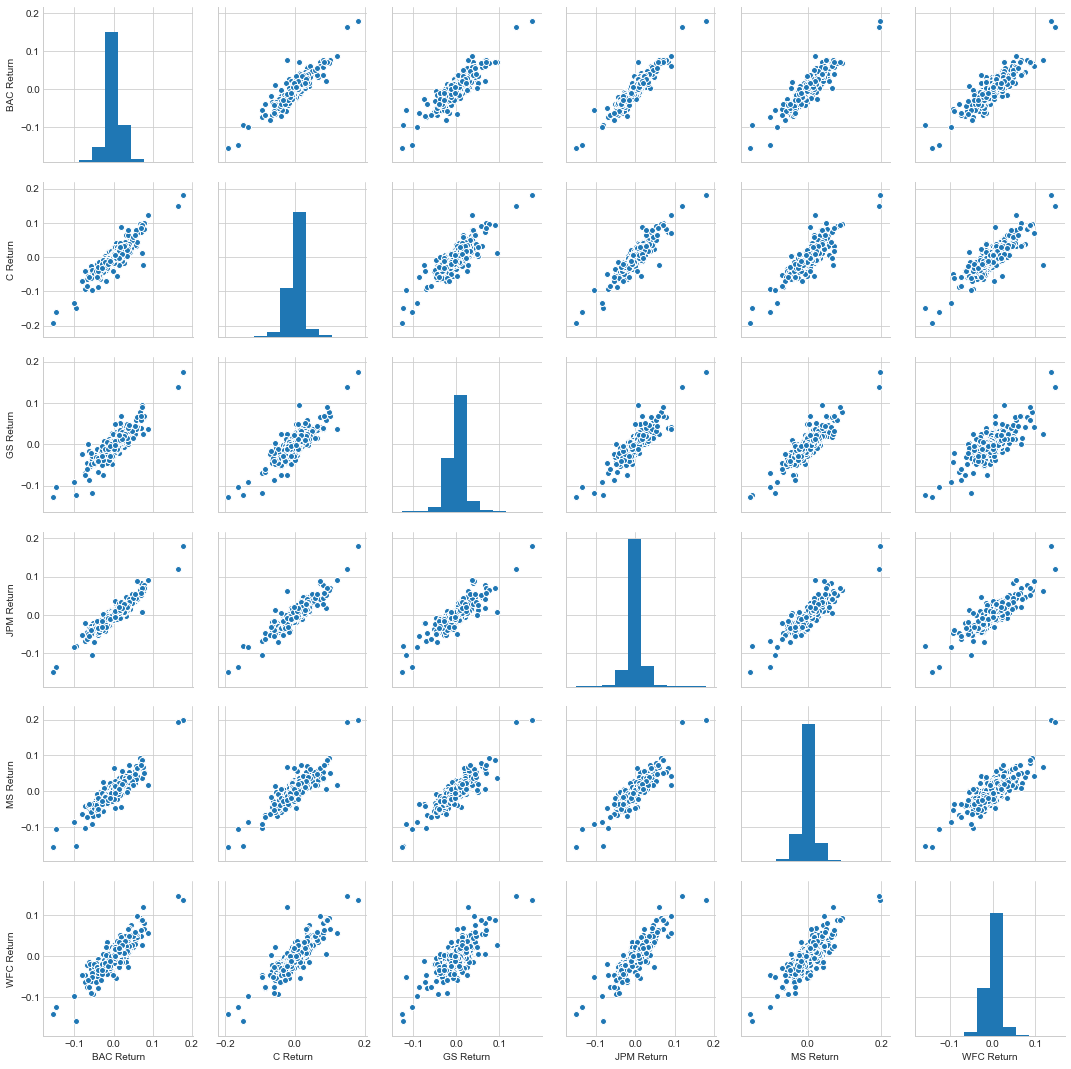

In [4]:
# Create a pairplot using seaborn of the returns dataframe
sns.pairplot(returns[1:])

In [5]:
# Using this returns DataFrame, figure out on what dates each bank stock had the worst single day returns
returns.idxmin()

BAC Return   2020-03-16
C Return     2020-03-16
GS Return    2020-03-16
JPM Return   2020-03-16
MS Return    2020-03-16
WFC Return   2020-03-12
dtype: datetime64[ns]

In [6]:
# Using this returns DataFrame, figure out on what dates each bank stock had the most single day returns
returns.idxmax()

BAC Return   2020-03-13
C Return     2020-03-13
GS Return    2020-03-13
JPM Return   2020-03-13
MS Return    2020-03-13
WFC Return   2020-03-24
dtype: datetime64[ns]

In [7]:
# Display the standard deviation of the returns
returns.std()

BAC Return    0.021678
C Return      0.023535
GS Return     0.020057
JPM Return    0.018925
MS Return     0.021945
WFC Return    0.020667
dtype: float64

In [8]:
# Display the standard deviation of the returns for the year 2020
returns.loc['2020-01-01':'2020-10-11'].std()

BAC Return    0.039271
C Return      0.046114
GS Return     0.035835
JPM Return    0.036479
MS Return     0.039215
WFC Return    0.041092
dtype: float64

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



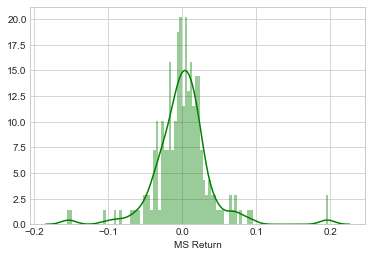

In [9]:
# Create a distplot using seaborn of the 2020 returns for Morgan Stanley
sns.distplot(returns['MS Return'].loc['2020-01-01':'2020-10-11'],bins=100,color='green')

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



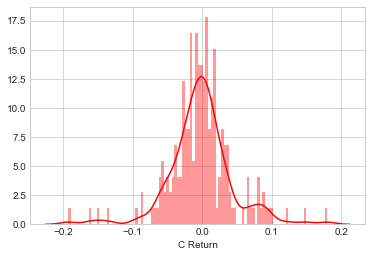

In [10]:
# Create a distplot using seaborn of the 2020 returns for CitiGroup
sns.distplot(returns['C Return'].loc['2020-01-01':'2020-10-11'], bins=100,color='red')

In [11]:
# Create a line iplot showing Close price for each bank for the entire index of time.
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

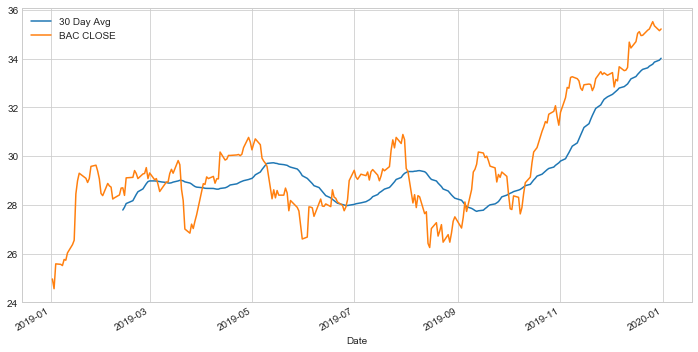

In [12]:
# Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2019
plt.figure(figsize=(12,6))
BAC['Close'].loc['2019-01-01':'2020-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2019-01-01':'2020-01-01'].plot(label='BAC CLOSE')
plt.legend()

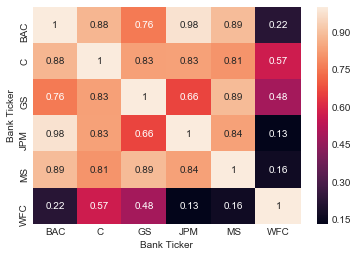

In [13]:
# Create a heatmap of the correlation between the stocks Close Price using Seaborn.
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

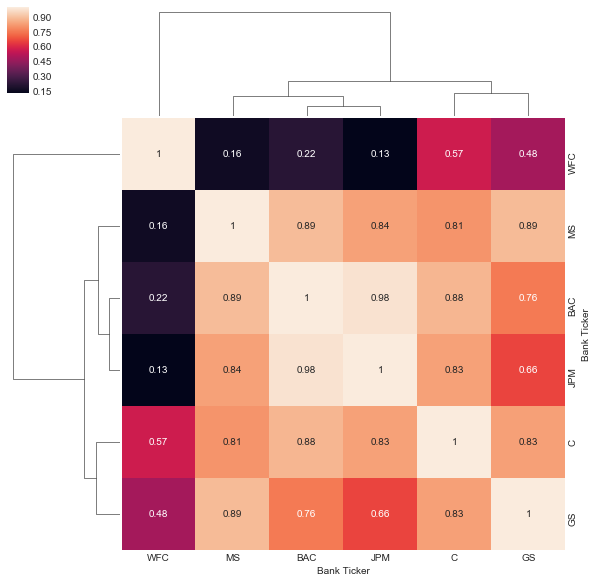

In [14]:
# Use seaborn's clustermap to cluster the correlations together
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [15]:
# Create a heatmap of the correlation between the stocks Close Price using Plotly
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

In [16]:
# Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2020 to October 11th 2020.
BAC[['Open', 'High', 'Low', 'Close']].loc['2020-01-01':'2020-11-10'].iplot(kind='candle')

In [17]:
# Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley from the year 2018.
MS['Close'].loc['2018-01-01':'2020-10-11'].ta_plot(study='sma',periods=[13,30,60],title='Simple Moving Averages')

In [18]:
# Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America from the year 2018
BAC['Close'].loc['2018-01-01':'2020-10-11'].ta_plot(study='boll')